In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.datasets import load_boston
x = load_boston()
df = pd.DataFrame(x.data, columns = x.feature_names)
df["MEDV"] = x.target
X_df = df.drop("MEDV",1)   #Feature Matrix
y_df = df["MEDV"]          #Target Variable
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
from sklearn.feature_selection import mutual_info_classif

In [6]:
df_v = pd.read_csv('voters.csv', index_col='Unnamed: 0')
df_v['race']=df_v['race'].astype('category')
df_v['party']=df_v['party'].astype('category')
df_v['age_group']=df_v['age_group'].astype('category')
# Encoding
df_v['race'] = df_v['race'].cat.codes
df_v['party']=df_v['party'].cat.codes
df_v['age_group']=df_v['age_group'].cat.codes

X = df_v.drop(['party'], axis=1)
y = df_v['party']
importance = mutual_info_classif(X, y, random_state=100)

In [7]:
X.head()

,race,age_group
0,2,0
1,4,2
2,1,2
3,4,2
4,4,0


In [8]:
importance

array([0.16051942, 0.00631776])

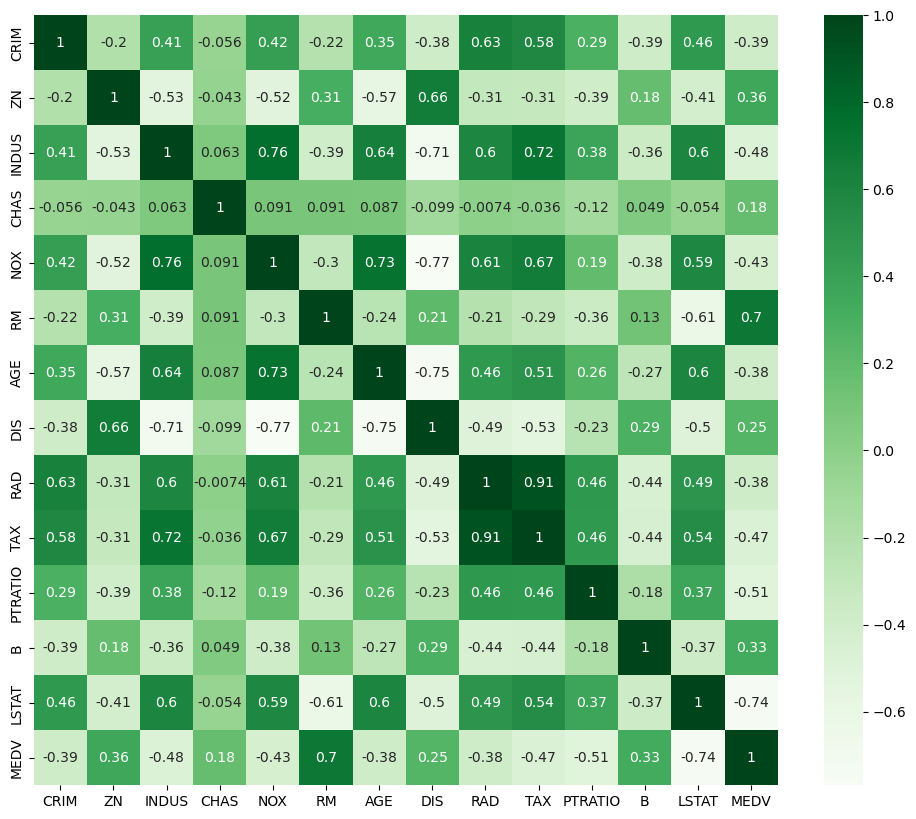

In [9]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Greens)
plt.show()

<AxesSubplot:>

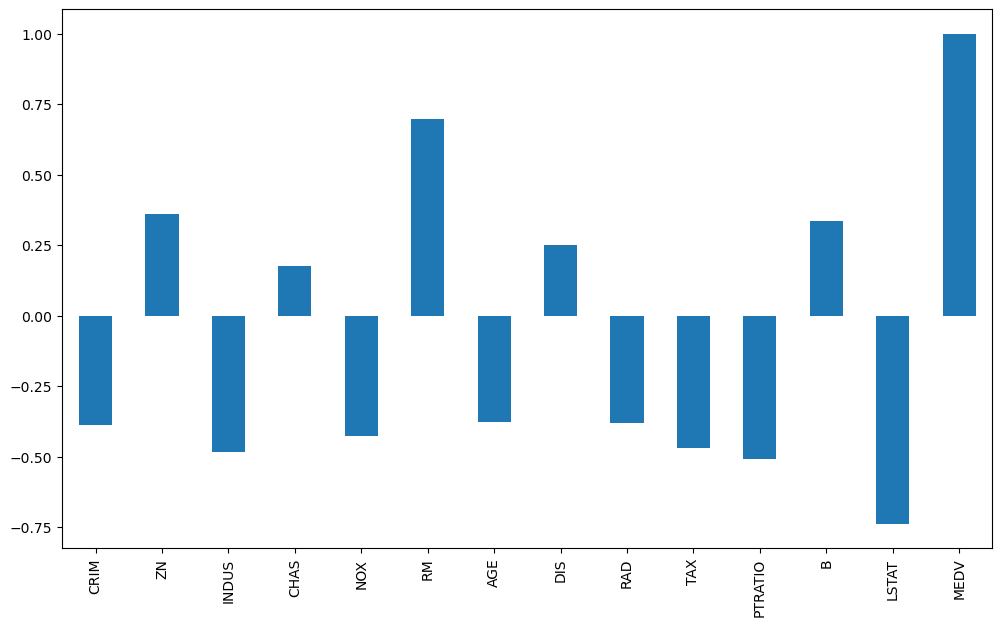

In [10]:
plt.figure(figsize=(12,7))
df.corr()['MEDV'].plot(kind='bar')

In [11]:
#Correlation with output variable
cor_target = abs(cor["MEDV"])
cor_target

CRIM       0.388305
ZN         0.360445
INDUS      0.483725
CHAS       0.175260
NOX        0.427321
RM         0.695360
AGE        0.376955
DIS        0.249929
RAD        0.381626
TAX        0.468536
PTRATIO    0.507787
B          0.333461
LSTAT      0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

In [12]:
#Selecting highly correlated features
relevant_features = cor_target[cor_target > 0.4]
relevant_features

INDUS      0.483725
NOX        0.427321
RM         0.695360
TAX        0.468536
PTRATIO    0.507787
LSTAT      0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

In [13]:
from sklearn.feature_selection import VarianceThreshold

In [16]:
v_threshold = VarianceThreshold(threshold=0)
v_threshold.fit(X_df)
v_threshold.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])